In [1]:
import pandas as pd
import numpy as np

In [19]:
sf = pd.read_csv("../data/2014-present-sf.csv", header = 2)

In [11]:
sf.head()

,time,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),sunrise (iso8601),sunset (iso8601),precipitation_sum (mm),wind_speed_10m_max (km/h)
0,2014-01-01,1,17.0,6.3,9.9,2014-01-01T15:25,2014-01-02T01:01,0.0,10.5
1,2014-01-02,1,18.4,3.9,10.3,2014-01-02T15:25,2014-01-03T01:02,0.0,10.9
2,2014-01-03,1,18.5,7.1,11.7,2014-01-03T15:25,2014-01-04T01:03,0.0,8.6
3,2014-01-04,1,18.8,4.1,11.1,2014-01-04T15:25,2014-01-05T01:04,0.0,7.5
4,2014-01-05,0,18.5,5.2,10.9,2014-01-05T15:25,2014-01-06T01:04,0.0,13.1


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3615 entries, 0 to 3614
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time                       3615 non-null   object 
 1   weather_code (wmo code)    3615 non-null   int64  
 2   temperature_2m_max (°C)    3615 non-null   float64
 3   temperature_2m_min (°C)    3615 non-null   float64
 4   temperature_2m_mean (°C)   3615 non-null   float64
 5   sunrise (iso8601)          3615 non-null   object 
 6   sunset (iso8601)           3615 non-null   object 
 7   precipitation_sum (mm)     3615 non-null   float64
 8   wind_speed_10m_max (km/h)  3615 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 254.3+ KB


In [20]:
sf['time'] = pd.to_datetime(sf['time'])
sf.set_index('time', inplace = True)

In [21]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3615 entries, 2014-01-01 to 2023-11-24
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   weather_code (wmo code)    3615 non-null   int64  
 1   temperature_2m_max (°C)    3615 non-null   float64
 2   temperature_2m_min (°C)    3615 non-null   float64
 3   temperature_2m_mean (°C)   3615 non-null   float64
 4   sunrise (iso8601)          3615 non-null   object 
 5   sunset (iso8601)           3615 non-null   object 
 6   precipitation_sum (mm)     3615 non-null   float64
 7   wind_speed_10m_max (km/h)  3615 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 254.2+ KB


In [22]:
type(sf.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [30]:
sf['sunrise (iso8601)'] = pd.to_datetime(sf['sunrise (iso8601)'])
sf['sunset (iso8601)'] = pd.to_datetime(sf['sunset (iso8601)'])

In [42]:
sf['sunrise_mins'] = sf['sunrise (iso8601)'].dt.hour*60 + sf['sunrise (iso8601)'].dt.minute
sf['sunset_mins'] = sf['sunset (iso8601)'].dt.hour*60 + sf['sunset (iso8601)'].dt.minute

<Axes: xlabel='time'>

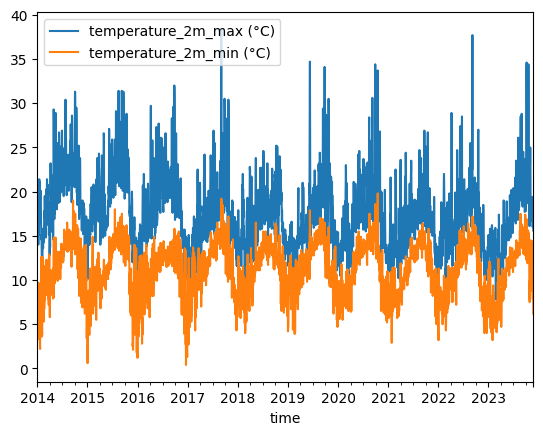

In [38]:
sf[['temperature_2m_max (°C)', 'temperature_2m_min (°C)']].plot()

<Axes: xlabel='time'>

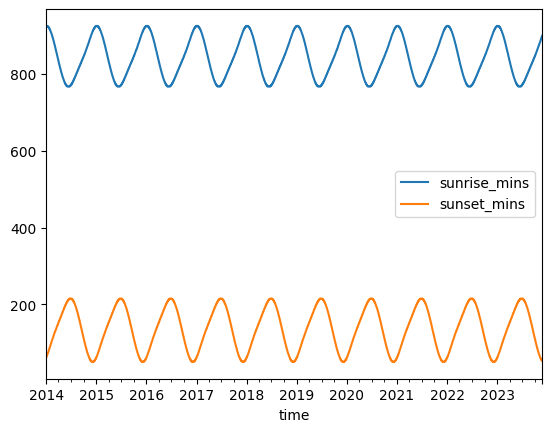

In [43]:
sf[['sunrise_mins', 'sunset_mins']].plot()

<Axes: xlabel='time', ylabel='sunrise_mins'>

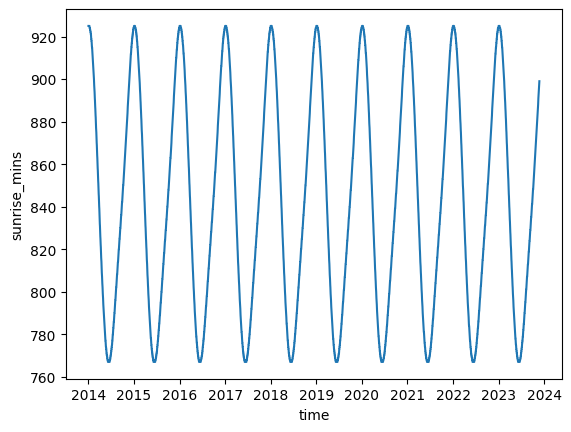

In [47]:
sns.lineplot(x = sf.index, y = sf['sunrise_mins'])

In [48]:
sf = pd.read_csv("../data/2014-present-sf.csv", header = 2)
sf['location'] = 'SF'

ny = pd.read_csv("../data/2014-present-new-york.csv", header = 2)
ny['location'] = 'NY'

miami = pd.read_csv("../data/2014-present-miami.csv", header = 2)
miami['location'] = 'MIA'

austin = pd.read_csv("../data/2014-present-austin.csv", header = 2)
austin['location'] = 'AUS'

chicago = pd.read_csv("../data/2014-present-chicago.csv", header = 2)
chicago['location'] = 'CHI'

df = pd.concat([sf, ny, miami, austin, chicago])

In [50]:
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace = True)

In [52]:
df['sunrise (iso8601)'] = pd.to_datetime(df['sunrise (iso8601)'])
df['sunset (iso8601)'] = pd.to_datetime(df['sunset (iso8601)'])

df['sunrise_mins'] = df['sunrise (iso8601)'].dt.hour*60 + df['sunrise (iso8601)'].dt.minute
df['sunset_mins'] = df['sunset (iso8601)'].dt.hour*60 + df['sunset (iso8601)'].dt.minute

<Axes: xlabel='time', ylabel='sunrise_mins'>

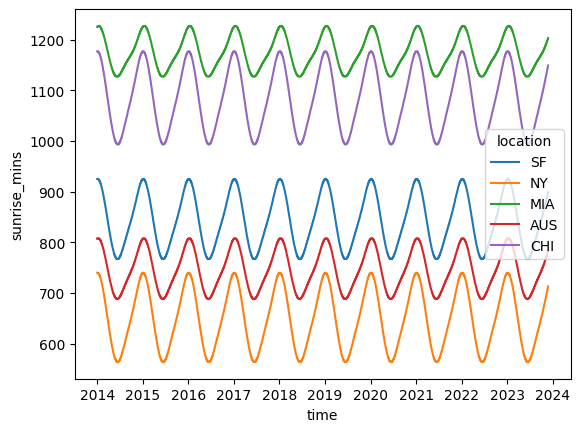

In [53]:
sns.lineplot(
    x = df.index,
    y = df['sunrise_mins'],
    hue = df['location']
)

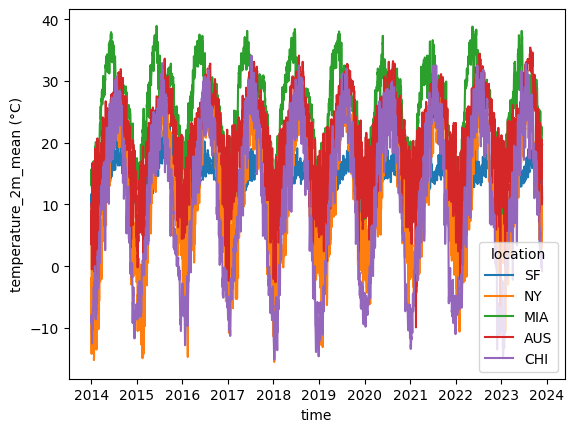

In [54]:
sns.lineplot(
    x = df.index,
    y = df['temperature_2m_mean (°C)'],
    hue = df['location']
);